## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_test_results = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
full_test_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
full_test_results["Mouse ID"].nunique()

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


full_test_results[full_test_results.duplicated(subset=["Mouse ID","Timepoint"], keep="first")]



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

#satisfied with the code above 

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


full_test_results = full_test_results[full_test_results["Mouse ID"] != "g989"]

full_test_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [12]:
# Checking the number of mice in the clean DataFrame.
full_test_results["Mouse ID"].nunique()


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#full_test_result = full_test_results.set_index("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = full_test_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = full_test_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varience = full_test_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dv = full_test_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = full_test_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.

stat_summary_dict = {"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":varience,
                    "Tumor Volume Std. Dev.":std_dv, "Tumor Volume Std. Err.":sem}

stat_summary_df = pd.DataFrame(stat_summary_dict)

stat_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
vol_test_results = full_test_results.groupby("Drug Regimen")["Tumor Volume (mm3)"]

vol_test_results.agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

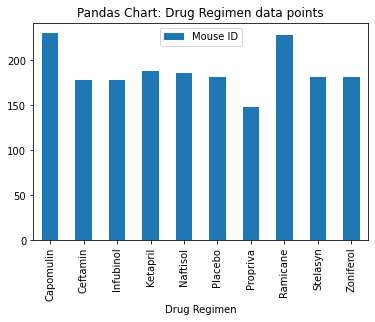

In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

chart_values = full_test_results.groupby("Drug Regimen")["Mouse ID"].count()
chart_values = pd.DataFrame(chart_values)
chart_values = chart_values.reset_index()


chart_values.plot.bar(x="Drug Regimen", y="Mouse ID", title = "Pandas Chart: Drug Regimen data points")



Text(0, 0.5, 'Number of Data Points')

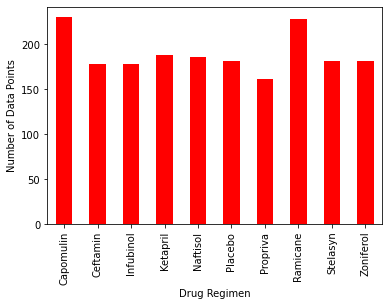

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

mouse_count = full_test_results.groupby("Drug Regimen")["Mouse ID"].count()
mouse_count.plot(kind="bar", facecolor="r")
plt.ylabel("Number of Data Points")



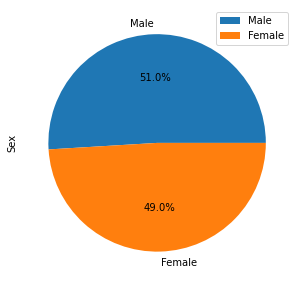

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_values = pd.DataFrame(full_test_results["Sex"].value_counts())
gender_values
plot = gender_values.plot.pie(y='Sex', figsize=(5, 5), autopct='%0.1f%%')

Text(0.0, 1.0, 'sex')

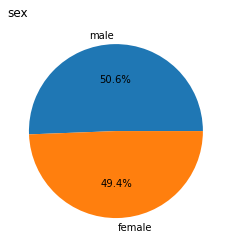

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = full_test_results["Sex"].value_counts()
lables = ["male", "female"]
plt.pie(genders,labels = lables, autopct='%0.1f%%')
plt.title("sex", loc="left")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = pd.DataFrame(full_test_results.groupby("Mouse ID")["Timepoint"].max())
 
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_volume = pd.merge(final_tumor_volume, full_test_results, how="left", on=["Mouse ID", "Timepoint"])
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(treatments)):
         
        # Locate the rows which contain mice on each drug and get the tumor volumes
    df = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatments[i]]
    
    quartiles = df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
       # Determine outliers using upper and lower bounds
    lower_outliers = len(df.loc[df["Tumor Volume (mm3)"] < lowerq - (1.5*iqr)])
    upper_outliers = len(df.loc[df["Tumor Volume (mm3)"] > upperq + (1.5*iqr)])
    total_outliers = lower_outliers + upper_outliers
       
        # add subset 
    tumor_vol_data.append(df["Tumor Volume (mm3)"])
    
    print(f"the IQR for {treatments[i]} is {iqr} ")
    
    if total_outliers > 0:
        print(f'''{treatments[i]} has {total_outliers} potential outliers
        ''')
    else:
          print(f'''{treatments[i]} has 0 potential outliers
                ''')
        
    

the IQR for Capomulin is 7.781863460000004 
Capomulin has 0 potential outliers
                
the IQR for Ramicane is 9.098536719999998 
Ramicane has 0 potential outliers
                
the IQR for Infubinol is 11.477135160000003 
Infubinol has 1 potential outliers
        
the IQR for Ceftamin is 15.577752179999997 
Ceftamin has 0 potential outliers
                


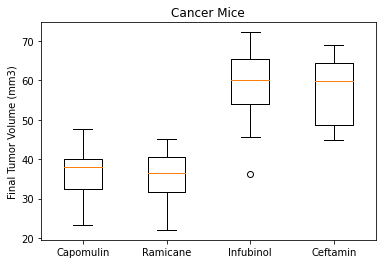

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Cancer Mice')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
ax1.set_xticklabels(treatments)

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

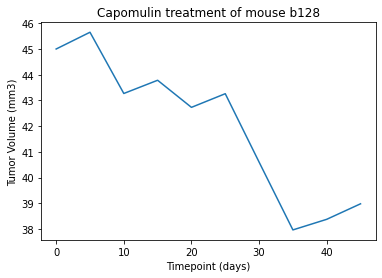

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = full_test_results.loc[(full_test_results["Drug Regimen"] == "Capomulin") & (full_test_results["Mouse ID"] == "b128")]
capomulin_sr = capomulin_df.set_index("Timepoint")
capomulin_sr = capomulin_sr["Tumor Volume (mm3)"]

plt.plot(capomulin_sr)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")



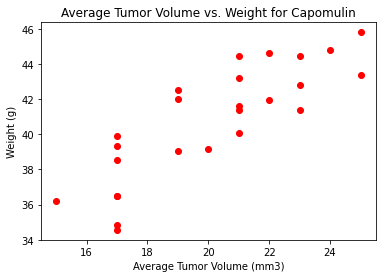

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = full_test_results.loc[full_test_results["Drug Regimen"] == "Capomulin"]

avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight_tumor_vol = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

plt.title("Average Tumor Volume vs. Weight for Capomulin")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.scatter(weight_tumor_vol, avg_tumor_vol, marker="o", color="red")

## Correlation and Regression

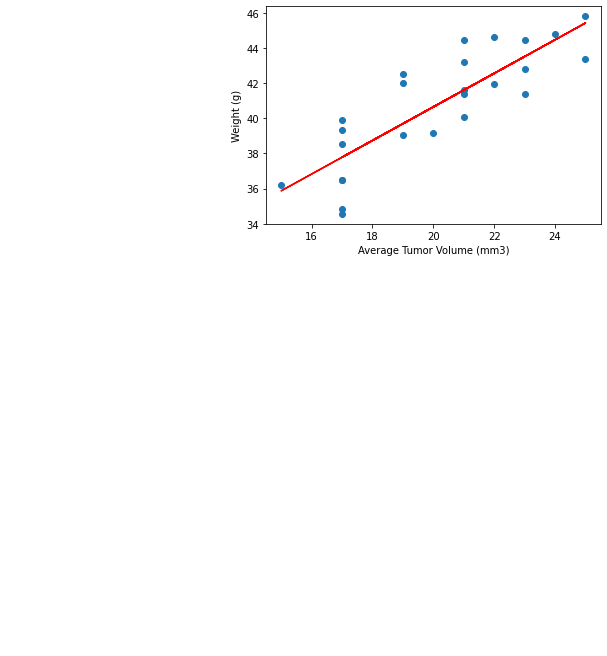

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight_tumor_vol
y_values = avg_tumor_vol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()